In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df['not.fully.paid'].value_counts(normalize=True)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

## Modelling With Imbalance target class

### Feature Engineering non Numeric Features

In [5]:
target = df['not.fully.paid']
features = df.drop('not.fully.paid', axis=1)

In [6]:
# how to make Imbalance target become balance sampling:
# undersampling, oversampling(random os, SMOTE), classweight

In [7]:
features['purpose']=features['purpose'].astype('category')
features['purpose'].cat.categories=list(range(0,7))

In [8]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

In [9]:
def class_report_by_algo(x,y,model):
    X_train,X_test,y_train,y_test = tts(x,y)
    clf = model()
    clf.fit(X_train,y_train)
    clf.predict(X_test)
    
    pred_test=clf.predict(X_test)
    pred_train=clf.predict(X_train)
    print('Class Report Data Test')
    print(classification_report(y_test,pred_test))
    print('==============')
    print('Class Report Data Train')
    print(classification_report(y_train,pred_train))    
    

In [10]:
class_report_by_algo(features,target,LogisticRegression)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Class Report Data Test
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2001
           1       0.40      0.02      0.03       394

   micro avg       0.83      0.83      0.83      2395
   macro avg       0.62      0.51      0.47      2395
weighted avg       0.77      0.83      0.76      2395

Class Report Data Train
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6044
           1       0.43      0.02      0.03      1139

   micro avg       0.84      0.84      0.84      7183
   macro avg       0.64      0.51      0.47      7183
weighted avg       0.78      0.84      0.77      7183



In [11]:
2000+395

2395

In [12]:
6045+1138

7183

In [13]:
395/2395

0.1649269311064718

In [14]:
class_report_by_algo(features,target,DecisionTreeClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2032
           1       0.19      0.22      0.20       363

   micro avg       0.73      0.73      0.73      2395
   macro avg       0.52      0.52      0.52      2395
weighted avg       0.75      0.73      0.74      2395

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6013
           1       1.00      1.00      1.00      1170

   micro avg       1.00      1.00      1.00      7183
   macro avg       1.00      1.00      1.00      7183
weighted avg       1.00      1.00      1.00      7183



In [15]:
class_report_by_algo(features,target,RandomForestClassifier)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class Report Data Test
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2007
           1       0.26      0.04      0.06       388

   micro avg       0.83      0.83      0.83      2395
   macro avg       0.55      0.51      0.48      2395
weighted avg       0.75      0.83      0.77      2395

Class Report Data Train
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6038
           1       1.00      0.87      0.93      1145

   micro avg       0.98      0.98      0.98      7183
   macro avg       0.99      0.94      0.96      7183
weighted avg       0.98      0.98      0.98      7183



In [16]:
class_report_by_algo(features,target,GradientBoostingClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2013
           1       0.52      0.03      0.06       382

   micro avg       0.84      0.84      0.84      2395
   macro avg       0.68      0.51      0.49      2395
weighted avg       0.79      0.84      0.78      2395

Class Report Data Train
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6032
           1       0.93      0.07      0.13      1151

   micro avg       0.85      0.85      0.85      7183
   macro avg       0.89      0.53      0.52      7183
weighted avg       0.86      0.85      0.79      7183



## Handling Imbalance Data

### Undersampling

In [1]:
minority_data = df[df['not.fully.paid']==1]
mayority_data = df[df['not.fully.paid']==0]

NameError: name 'df' is not defined

In [18]:
index_for_mayority = np.random.choice(mayority_data.index, len(minority_data))

In [19]:
df_class_0 = df.loc[index_for_mayority]

In [20]:
undersampling_df = pd.concat([df_class_0, minority_data])

In [21]:
undersampling_df['not.fully.paid'].value_counts(normalize=True)

1    0.5
0    0.5
Name: not.fully.paid, dtype: float64

## Modelling With Undersampling Data

### Feature Engineering

In [22]:
undersampling_df = pd.get_dummies(undersampling_df,columns=['purpose'], drop_first=True)

In [23]:
target_1 = undersampling_df['not.fully.paid']
features_1 = undersampling_df.drop('not.fully.paid', axis=1)

In [24]:
class_report_by_algo(features_1,target_1,LogisticRegression)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Class Report Data Test
              precision    recall  f1-score   support

           0       0.59      0.69      0.64       383
           1       0.63      0.51      0.56       384

   micro avg       0.60      0.60      0.60       767
   macro avg       0.61      0.60      0.60       767
weighted avg       0.61      0.60      0.60       767

Class Report Data Train
              precision    recall  f1-score   support

           0       0.61      0.67      0.64      1150
           1       0.63      0.56      0.59      1149

   micro avg       0.62      0.62      0.62      2299
   macro avg       0.62      0.62      0.62      2299
weighted avg       0.62      0.62      0.62      2299



In [25]:
class_report_by_algo(features_1,target_1,DecisionTreeClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.58      0.65      0.62       388
           1       0.59      0.52      0.55       379

   micro avg       0.59      0.59      0.59       767
   macro avg       0.59      0.59      0.58       767
weighted avg       0.59      0.59      0.58       767

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1145
           1       1.00      1.00      1.00      1154

   micro avg       1.00      1.00      1.00      2299
   macro avg       1.00      1.00      1.00      2299
weighted avg       1.00      1.00      1.00      2299



In [26]:
class_report_by_algo(features_1,target_1,RandomForestClassifier)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class Report Data Test
              precision    recall  f1-score   support

           0       0.61      0.69      0.65       390
           1       0.63      0.54      0.58       377

   micro avg       0.62      0.62      0.62       767
   macro avg       0.62      0.62      0.61       767
weighted avg       0.62      0.62      0.62       767

Class Report Data Train
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1143
           1       0.99      0.98      0.99      1156

   micro avg       0.99      0.99      0.99      2299
   macro avg       0.99      0.99      0.99      2299
weighted avg       0.99      0.99      0.99      2299



In [27]:
class_report_by_algo(features_1,target_1,GradientBoostingClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.64      0.70      0.67       383
           1       0.67      0.61      0.64       384

   micro avg       0.65      0.65      0.65       767
   macro avg       0.65      0.65      0.65       767
weighted avg       0.65      0.65      0.65       767

Class Report Data Train
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1150
           1       0.78      0.74      0.76      1149

   micro avg       0.77      0.77      0.77      2299
   macro avg       0.77      0.77      0.76      2299
weighted avg       0.77      0.77      0.77      2299



### Oversampling

### Random Oversampling

In [29]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [30]:
ros = RandomOverSampler()

In [31]:
X_ros, y_ros = ros.fit_sample(features,target)

In [32]:
df_over_all=pd.DataFrame(X_ros,columns=features.columns)
df_over_all['not.fully.paid'] = y_ros

In [33]:
df_over_all['not.fully.paid'].value_counts(normalize=True)

1    0.5
0    0.5
Name: not.fully.paid, dtype: float64

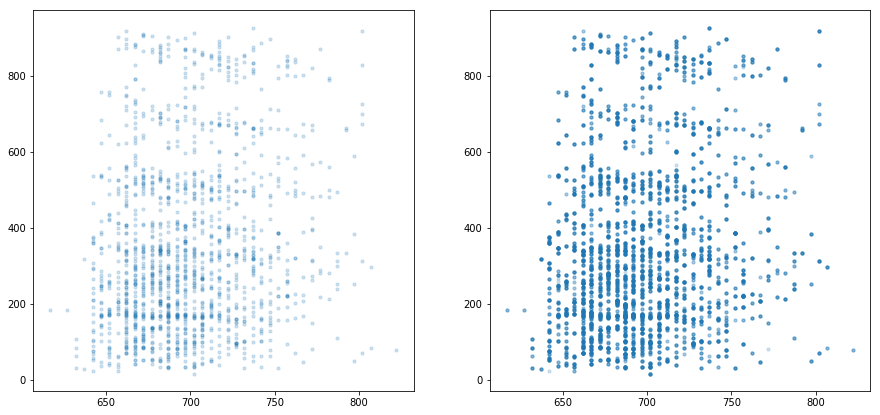

In [34]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(15,7))
ax[0].scatter(df[df['not.fully.paid']==1]['fico'], df[df['not.fully.paid']==1]['installment'], s=10, alpha=0.2)
ax[1].scatter(df_over_all[df_over_all['not.fully.paid']==1]['fico'],df_over_all[df_over_all['not.fully.paid']==1]['installment'], s=10, alpha=0.2)

In [35]:
df_over_all.head(1)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.1,11.3504,19.48,737,5639.96,28854,52.1,0,0,0,0


In [36]:
class_report_by_algo(df_over_all.drop('not.fully.paid',axis=1),df_over_all['not.fully.paid'], LogisticRegression)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Class Report Data Test
              precision    recall  f1-score   support

           0       0.59      0.66      0.62      1999
           1       0.62      0.54      0.58      2024

   micro avg       0.60      0.60      0.60      4023
   macro avg       0.60      0.60      0.60      4023
weighted avg       0.60      0.60      0.60      4023

Class Report Data Train
              precision    recall  f1-score   support

           0       0.59      0.64      0.61      6046
           1       0.61      0.56      0.58      6021

   micro avg       0.60      0.60      0.60     12067
   macro avg       0.60      0.60      0.60     12067
weighted avg       0.60      0.60      0.60     12067



In [37]:
class_report_by_algo(df_over_all.drop('not.fully.paid',axis=1),df_over_all['not.fully.paid'], DecisionTreeClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      2014
           1       0.84      0.99      0.91      2009

   micro avg       0.90      0.90      0.90      4023
   macro avg       0.91      0.90      0.90      4023
weighted avg       0.91      0.90      0.90      4023

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6031
           1       1.00      1.00      1.00      6036

   micro avg       1.00      1.00      1.00     12067
   macro avg       1.00      1.00      1.00     12067
weighted avg       1.00      1.00      1.00     12067



In [38]:
class_report_by_algo(df_over_all.drop('not.fully.paid',axis=1),df_over_all['not.fully.paid'], RandomForestClassifier)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class Report Data Test
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2058
           1       0.94      0.98      0.96      1965

   micro avg       0.96      0.96      0.96      4023
   macro avg       0.96      0.96      0.96      4023
weighted avg       0.96      0.96      0.96      4023

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5987
           1       1.00      1.00      1.00      6080

   micro avg       1.00      1.00      1.00     12067
   macro avg       1.00      1.00      1.00     12067
weighted avg       1.00      1.00      1.00     12067



In [39]:
class_report_by_algo(df_over_all.drop('not.fully.paid',axis=1),df_over_all['not.fully.paid'], GradientBoostingClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.71      0.68      0.69      2054
           1       0.68      0.71      0.69      1969

   micro avg       0.69      0.69      0.69      4023
   macro avg       0.70      0.70      0.69      4023
weighted avg       0.70      0.69      0.69      4023

Class Report Data Train
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      5991
           1       0.71      0.72      0.72      6076

   micro avg       0.71      0.71      0.71     12067
   macro avg       0.71      0.71      0.71     12067
weighted avg       0.71      0.71      0.71     12067



In [ ]:
def class_report_by_algo_oversampling(x,y,model):
    X_train,X_test,y_train,y_test = tts(x,y)
    clf = model()
    ros = RandomOverSampler(random_state=101)
    X_ros, y_ros = ros.fit_sample(X_train,y_train)
    
    clf.fit(X_ros,y_ros)
    
    pred_test=clf.predict(X_test)
    pred_train=clf.predict(X_ros)
    print('Class Report Data Test')
    print(classification_report(y_test,pred_test))
    print('==============')
    print('Class Report Data Train')
    print(classification_report(y_ros,pred_train))    
    

In [ ]:
class_report_by_algo_oversampling(features,target,LogisticRegression)

In [ ]:
class_report_by_algo_oversampling(features,target,DecisionTreeClassifier)

In [ ]:
class_report_by_algo_oversampling(features,target,RandomForestClassifier)

In [ ]:
class_report_by_algo_oversampling(features,target,GradientBoostingClassifier)

## SMOTE

### Syntetic Minority Over Sampling Techniques

In [ ]:
sm = SMOTE(random_state=101)

In [ ]:
X_sm, y_sm = sm.fit_sample(features,target)

In [ ]:
df_smote_all = pd.DataFrame(X_sm, columns=features.columns)

In [ ]:
df_smote_all['not.fully.paid']=y_sm

In [ ]:
df_smote_all['not.fully.paid'].value_counts()

In [ ]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(15,7))
ax[0].scatter(df[df['not.fully.paid']==1]['fico'], df[df['not.fully.paid']==1]['installment'], s=10, alpha=0.2)
ax[1].scatter(df_smote_all[df_smote_all['not.fully.paid']==1]['fico'],df_smote_all[df_smote_all['not.fully.paid']==1]['installment'], s=10, alpha=0.2)

In [ ]:
def class_report_by_algo_smote(x,y,model):
    X_train,X_test,y_train,y_test = tts(x,y)
    clf = model()
    sm = SMOTE(random_state=101)
    X_sm, y_sm = sm.fit_sample(X_train,y_train)
    
    clf.fit(X_sm,y_sm)
    
    pred_test=clf.predict(X_test)
    pred_train=clf.predict(X_sm)
    print('Class Report Data Test')
    print(classification_report(y_test,pred_test))
    print('==============')
    print('Class Report Data Train')
    print(classification_report(y_sm,pred_train))    
    

In [ ]:
class_report_by_algo(X_sm,y_sm,DecisionTreeClassifier)

In [ ]:
class_report_by_algo_smote(features,target,LogisticRegression)

In [ ]:
class_report_by_algo_smote(features,target,DecisionTreeClassifier)

In [ ]:
class_report_by_algo_smote(features,target,RandomForestClassifier)

In [ ]:
class_report_by_algo_smote(features,target,GradientBoostingClassifier)

## Class Weight

In [ ]:
X_train,X_test,y_train,y_test = tts(features,target,random_state=101)

In [ ]:
weight = {0:1, 1:8}

In [ ]:
model_w_class_weight = DecisionTreeClassifier(random_state=101,class_weight=weight,min_samples_leaf=50)

In [ ]:
model_w_class_weight.fit(X_train,y_train)

In [ ]:
prediction=model_w_class_weight.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction))

## Ensemble Method

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(min_samples_leaf=50, class_weight={0:1, 1:7})

In [43]:
rfc.fit(X_train,y_train)
prediction=rfc.predict(X_test)


NameError: name 'X_train' is not defined

In [ ]:
print(classification_report(y_test,prediction))

In [ ]:
rfc.estimators_[1]

In [ ]:
rfc.estimators_[0]

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(rfc.estimators_[0],out_file='rfc_1.dot', feature_names=features.columns, class_names=['penuh','macet'], rounded=True, proportion=False, precision=2, filled=True)